#1.Introduction
This is Data Analysis of crime in Boston from June 14, 2015 to September 18, 2018. Crime in Boston is a very interesting topic for exploration.Personally, I have been living in Greater-Boston for three years and crime here is always a topic of conversation with friends and family. Another reason is the availability of huge amounts of publicly available (high quality) crime datasets open for data scientists to mine and investigates such as this one, and This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.

This project can show regions which have high probability for crime occurrence, visulize crime prone areas, forecast the crimes occurrence and analyze the crime rates over the yrars. This helps to perform descriptive, predictive and prescriptive analysis on crime data.

Author: Jessie 

# 2.Import & Read Data

## 2.1 Install Packages

In [ ]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.5.1-3).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [ ]:
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

     | 165.5MB 34.6MB/s
  Running setup.py bdist_wheel for basemap ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-KiVaxJ/wheels/6c/c2/bd/d6fb8f2660e0591d357352aba1b117b3211d016994d933d792
Successfully built basemap


In [ ]:
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-lA4KdF
  Running setup.py bdist_wheel for folium ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-mhAkin/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium


## 2.2 Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline 
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess
sns.set_palette([ "#30a2da", "#fc4f30", "#e5ae38", "#6d904f", "#8b8b8b"])
from mpl_toolkits.basemap import Basemap
import folium
from sklearn.cluster import KMeans

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 2.3 Read Data

In [ ]:
file_id='166E_XsEnUrciks_XpuKmmdf2lNk5mFh9'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
data = pd.read_csv(csv_url)
crimes=pd.read_csv(csv_url)

# 3.Data Exploration

## 3.1 Understand the Raw Dataset

In [ ]:
data.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182075503           619             Larceny   
1      I182075502          1102               Fraud   
2      I182075501          3115  Investigate Person   
3      I182075500          3006  Medical Assistance   
4      I182075499           613             Larceny   

               OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0               LARCENY ALL OTHERS       A1             92      NaN   
1  FRAUD - FALSE PRETENSE / SCHEME       B2            238      NaN   
2               INVESTIGATE PERSON      C11            362      NaN   
3    SICK/INJURED/MEDICAL - PERSON       D4            953      NaN   
4              LARCENY SHOPLIFTING      NaN                     NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-09-18 20:36:00  2018      9     Tuesday    20    Part One   
1  2018-09-18 21:34:00  2018      9     Tuesday    21    Part Two   
2  2018-09-18 21:02:00  2018      9     Tuesday    21  Part Three   
3  2018-09-18 20:21:00  2018      9     Tuesday    20  Part Three   
4  2018-09-18 18:50:00  2018      9     Tuesday    18    Part One   

           STREET        Lat       Long                     Location  
0        COURT ST  42.358923 -71.058354  (42.35892279, -71.05835354)  
1  QUINCEFIELD ST  42.318730 -71.066607  (42.31873011, -71.06660708)  
2    MELVILLE AVE  42.293390 -71.071557  (42.29338993, -71.07155745)  
3   WASHINGTON ST  42.337212 -71.075976  (42.33721215, -71.07597603)  
4        DISTRICT  -1.000000  -1.000000   (-1.00000000, -1.00000000)

The provided dataset has different “features”, each one being of a different relevance. In this part I will proceed to analyse this dataset and extract the useful information out of it. Each record contains the following information:

INCIDENT_NUMBER: Internal BPD report number

OFFENSE_CODE: Numerical code of offense description

OFFENSE_CODE_GROUP: Internal categorization of offense_description

OFFENSE_DESCRIPTION: 	Primary descriptor of incident

DISTRICT: What district the crime was reported in

REPORTING_AREA: RA number associated with the where the crime was reported from.

SHOOTING: Indicated a shooting took place.

OCCURRED_ON_DATE: Earliest date and time the incident could have taken place

UCR_PART: 	Universal Crime Reporting Part number (1,2, 3)

In [ ]:
data.shape

(323395, 17)

In [ ]:
data.columns

Index([u'INCIDENT_NUMBER', u'OFFENSE_CODE', u'OFFENSE_CODE_GROUP',
       u'OFFENSE_DESCRIPTION', u'DISTRICT', u'REPORTING_AREA', u'SHOOTING',
       u'OCCURRED_ON_DATE', u'YEAR', u'MONTH', u'DAY_OF_WEEK', u'HOUR',
       u'UCR_PART', u'STREET', u'Lat', u'Long', u'Location'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323395 entries, 0 to 323394
Data columns (total 17 columns):
INCIDENT_NUMBER        323395 non-null object
OFFENSE_CODE           323395 non-null int64
OFFENSE_CODE_GROUP     323395 non-null object
OFFENSE_DESCRIPTION    323395 non-null object
DISTRICT               321648 non-null object
REPORTING_AREA         323395 non-null object
SHOOTING               1038 non-null object
OCCURRED_ON_DATE       323395 non-null object
YEAR                   323395 non-null int64
MONTH                  323395 non-null int64
DAY_OF_WEEK            323395 non-null object
HOUR                   323395 non-null int64
UCR_PART               323304 non-null object
STREET                 312492 non-null object
Lat                    303078 non-null float64
Long                   303078 non-null float64
Location               323395 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.9+ MB


In [ ]:
data.describe()

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  323395.000000  323395.000000  323395.000000  323395.000000   
mean     2317.952810    2016.579644       6.639357      13.116254   
std      1185.221027       1.003253       3.262914       6.295484   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  303078.000000  303078.000000  
mean       42.213216     -70.906410  
std         2.171183       3.512090  
min        -1.000000     -71.178674  
25%        42.297453     -71.097113  
50%        42.325538     -71.077497  
75%        42.348624     -71.062469  
max        42.395042      -1.000000

In [ ]:
data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1747
REPORTING_AREA              0
SHOOTING               322357
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   91
STREET                  10903
Lat                     20317
Long                    20317
Location                    0
dtype: int64

We miss a lot of shooting data. But this is understandable. Not all crimes are shooting. However, shooting is a hot topic of social security. Can we extract the shooting data and analyze them separately?

**Crime count by category**

In [ ]:
crime_count=pd.DataFrame(data.groupby("OFFENSE_CODE_GROUP").size().sort_values(ascending=False).rename("counts").reset_index())
crime_count.head(20)

OFFENSE_CODE_GROUP  counts
0   Motor Vehicle Accident Response   37628
1                           Larceny   26285
2                Medical Assistance   23897
3                Investigate Person   18956
4                             Other   18328
5                    Drug Violation   16761
6                    Simple Assault   16037
7                         Vandalism   15594
8                   Verbal Disputes   13294
9                             Towed   11456
10             Investigate Property   11282
11       Larceny From Motor Vehicle   10996
12                    Property Lost    9927
13                  Warrant Arrests    8489
14               Aggravated Assault    7925
15                       Violations    6149
16                            Fraud    5934
17             Residential Burglary    5668
18           Missing Person Located    5072
19                       Auto Theft    4892

** Crime count by street**

In [ ]:
street_count=pd.DataFrame(data.groupby("STREET").size().sort_values(ascending=False).rename("counts").reset_index())
street_count.head(20)

STREET  counts
0       WASHINGTON ST   14386
1       BLUE HILL AVE    7895
2         BOYLSTON ST    7309
3      DORCHESTER AVE    5229
4          TREMONT ST    4858
5   MASSACHUSETTS AVE    4780
6        HARRISON AVE    4668
7           CENTRE ST    4448
8    COMMONWEALTH AVE    4208
9       HYDE PARK AVE    3513
10        COLUMBIA RD    3248
11     HUNTINGTON AVE    3018
12           RIVER ST    2864
13          WARREN ST    2395
14          DUDLEY ST    2384
15       COLUMBUS AVE    2344
16           ADAMS ST    2075
17          BEACON ST    1991
18         NEWBURY ST    1917
19       CAMBRIDGE ST    1696

** Crime count by district**

In [ ]:
district_count=pd.DataFrame(data.groupby("DISTRICT").size().sort_values(ascending=False).rename("counts").reset_index())
district_count.head(20)

DISTRICT  counts
0        B2   50518
1       C11   43272
2        D4   42718
3        A1   36202
4        B3   35976
5        C6   23831
6       D14   20351
7       E13   17771
8       E18   17559
9        A7   13472
10       E5   13399
11      A15    6579

## 3.2 Data Cleaning & Processing

** Preparing a shooting dataframe for analysis **

In [ ]:
shoot_data=data.dropna(axis = 0, subset = ['SHOOTING'] )

In [ ]:
shoot_data.head(5)

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP  \
743      I182074638          3114  Investigate Property   
744      I182074638           413    Aggravated Assault   
811      I182074555           111              Homicide   
812      I182074555          3115    Investigate Person   
976      I182074372           413    Aggravated Assault   

                     OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
743                 INVESTIGATE PROPERTY       D4            157        Y   
744       ASSAULT - AGGRAVATED - BATTERY       D4            157        Y   
811  MURDER, NON-NEGLIGIENT MANSLAUGHTER       B2            330        Y   
812                   INVESTIGATE PERSON       B2            330        Y   
976       ASSAULT - AGGRAVATED - BATTERY      C11            257        Y   

        OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
743  2018-09-16 03:17:00  2018      9      Sunday     3  Part Three   
744  2018-09-16 03:17:00  2018      9      Sunday     3    Part One   
811  2018-09-15 20:10:00  2018      9    Saturday    20    Part One   
812  2018-09-15 20:10:00  2018      9    Saturday    20  Part Three   
976  2018-09-15 03:35:00  2018      9    Saturday     3    Part One   

            STREET        Lat       Long                     Location  
743    W NEWTON ST  42.340637 -71.075723  (42.34063708, -71.07572281)  
744    W NEWTON ST  42.340637 -71.075723  (42.34063708, -71.07572281)  
811  BLUE HILL AVE  42.307036 -71.084102  (42.30703587, -71.08410227)  
812  BLUE HILL AVE  42.307036 -71.084102  (42.30703587, -71.08410227)  
976    EVERETT AVE  42.315267 -71.063069  (42.31526714, -71.06306870)

**Cleaning geographic data for plotting**

In [ ]:
data['Lat'].describe()

count    303078.000000
mean         42.213216
std           2.171183
min          -1.000000
25%          42.297453
50%          42.325538
75%          42.348624
max          42.395042
Name: Lat, dtype: float64

In [ ]:
data.Lat = data["Lat"].replace(-1,np.nan)
data.Long = data["Long"].replace(-1,np.nan)
shoot_data.Lat = data["Lat"].replace(-1,np.nan)
shoot_data.Long = data["Long"].replace(-1,np.nan)

/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [ ]:
data['Lat'].describe()

count    302315.000000
mean         42.322280
std           0.031862
min          42.232413
25%          42.297555
50%          42.325610
75%          42.348624
max          42.395042
Name: Lat, dtype: float64

## 3.3 Date Visualization ##

###3.3.1 Top 10 Crime count by category ###

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

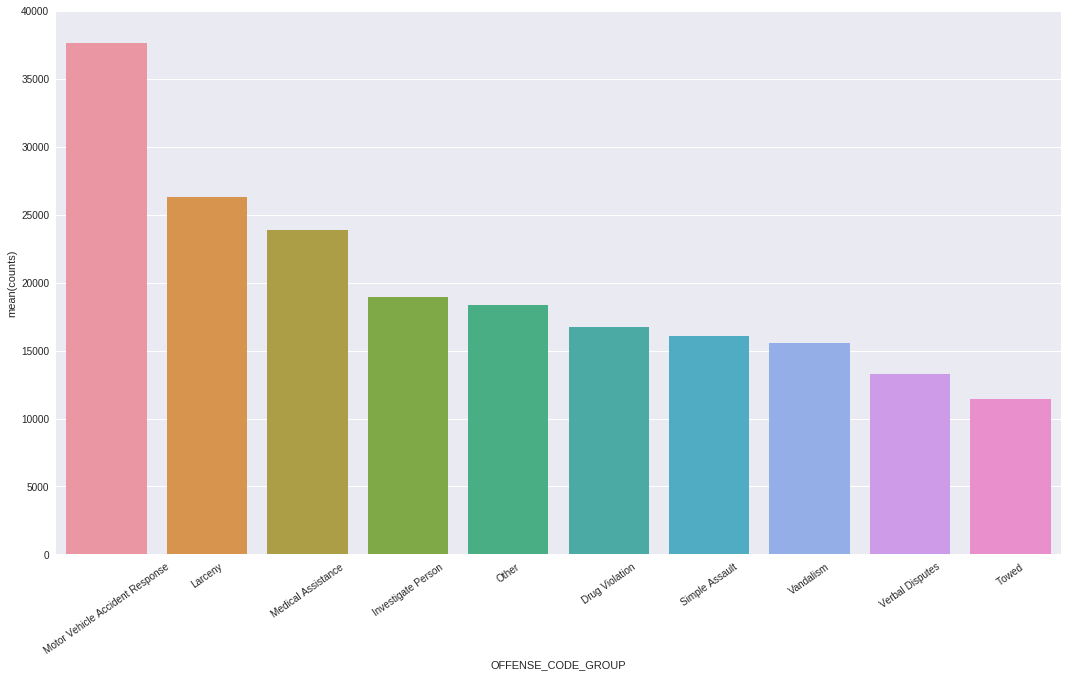

In [ ]:
crime_count = pd.concat([crime_count["counts"],crime_count["OFFENSE_CODE_GROUP"]],axis=1)
f,ax = plt.subplots(figsize=(18,10))
fig= sns.barplot(x = "OFFENSE_CODE_GROUP",y="counts",data=crime_count.head(10))
fig.axis(ymin=0,ymax=40000)
plt.xticks(rotation=35)

The graph can be seen that crimes are not equally distributed among categories but there is a huge difference between them. The largest number of crimes is motor vehicle accident response, and the second one is larceny.

###3.3.2 Crimes count by district ###

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

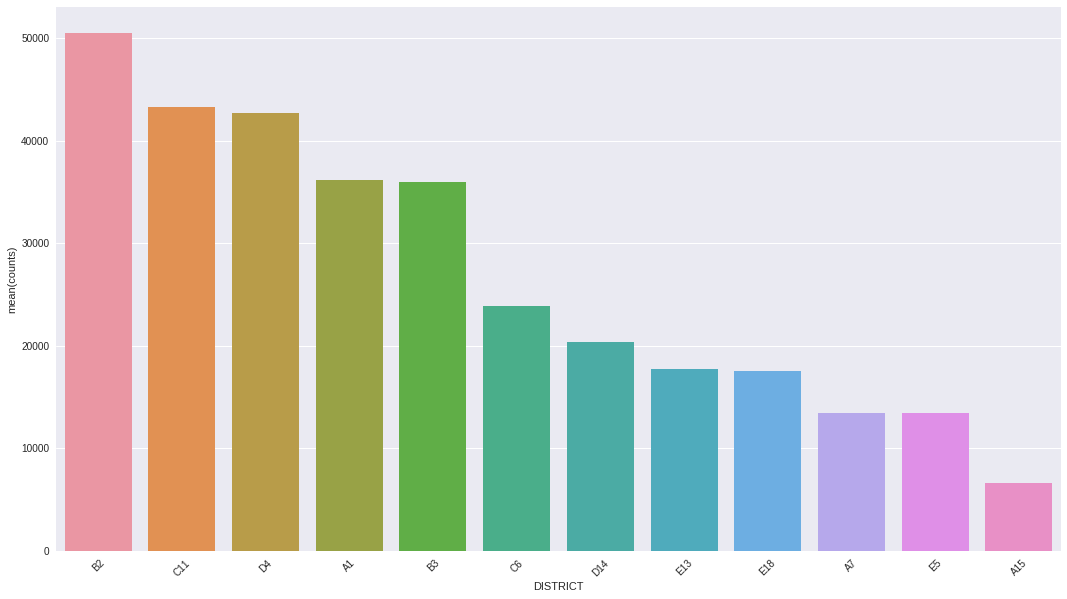

In [ ]:
district_count = pd.concat([district_count["counts"],district_count["DISTRICT"]],axis=1)
f,ax = plt.subplots(figsize=(18,10))
fig= sns.barplot(x = "DISTRICT",y="counts",data=district_count.head(20))
fig.axis(ymin=0)
plt.xticks(rotation=45)

### 3.3.3 Crimes count by street###

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

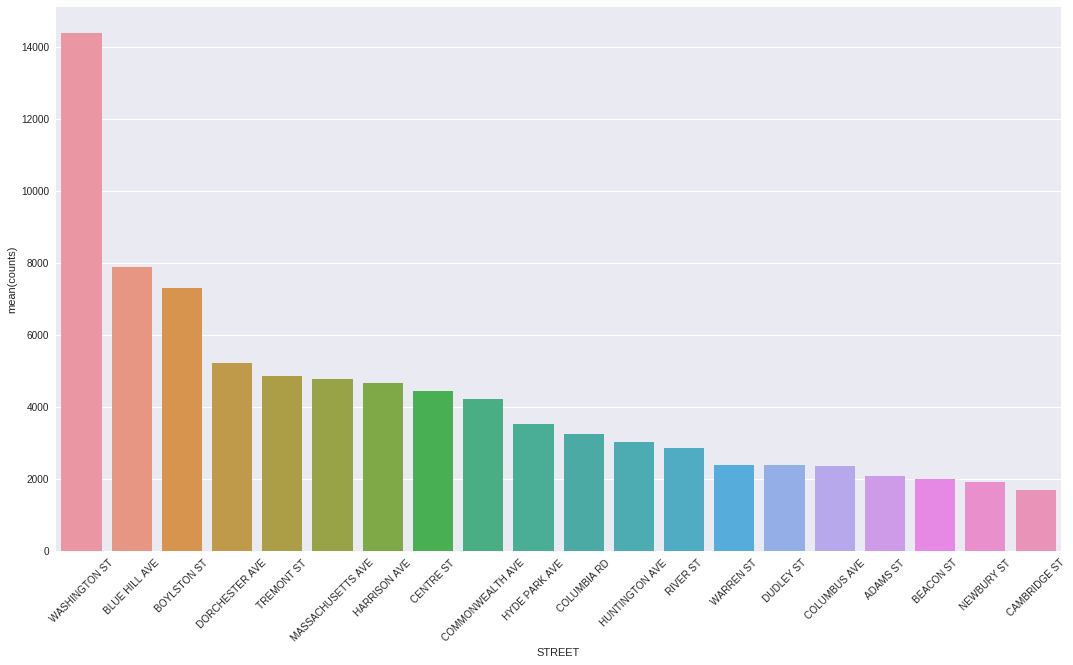

In [ ]:
street_count = pd.concat([street_count["counts"],street_count["STREET"]],axis=1)
f,ax = plt.subplots(figsize=(18,10))
fig= sns.barplot(x = "STREET",y="counts",data=street_count.head(20))
fig.axis(ymin=0)
plt.xticks(rotation=45)

The number of crimes on Washington Street is much higher than that on other blocks, and the police seem to be able to step up their patrols on this street.

### 3.3.4 Crimes count by time

In [ ]:
df = pd.to_datetime(data.OCCURRED_ON_DATE)
data.OCCURRED_ON_DATE=df
data["DAY"]=df.dt.day
data.index = pd.DatetimeIndex(data.OCCURRED_ON_DATE)

Text(0.5,1,u'number of crimes by hour')

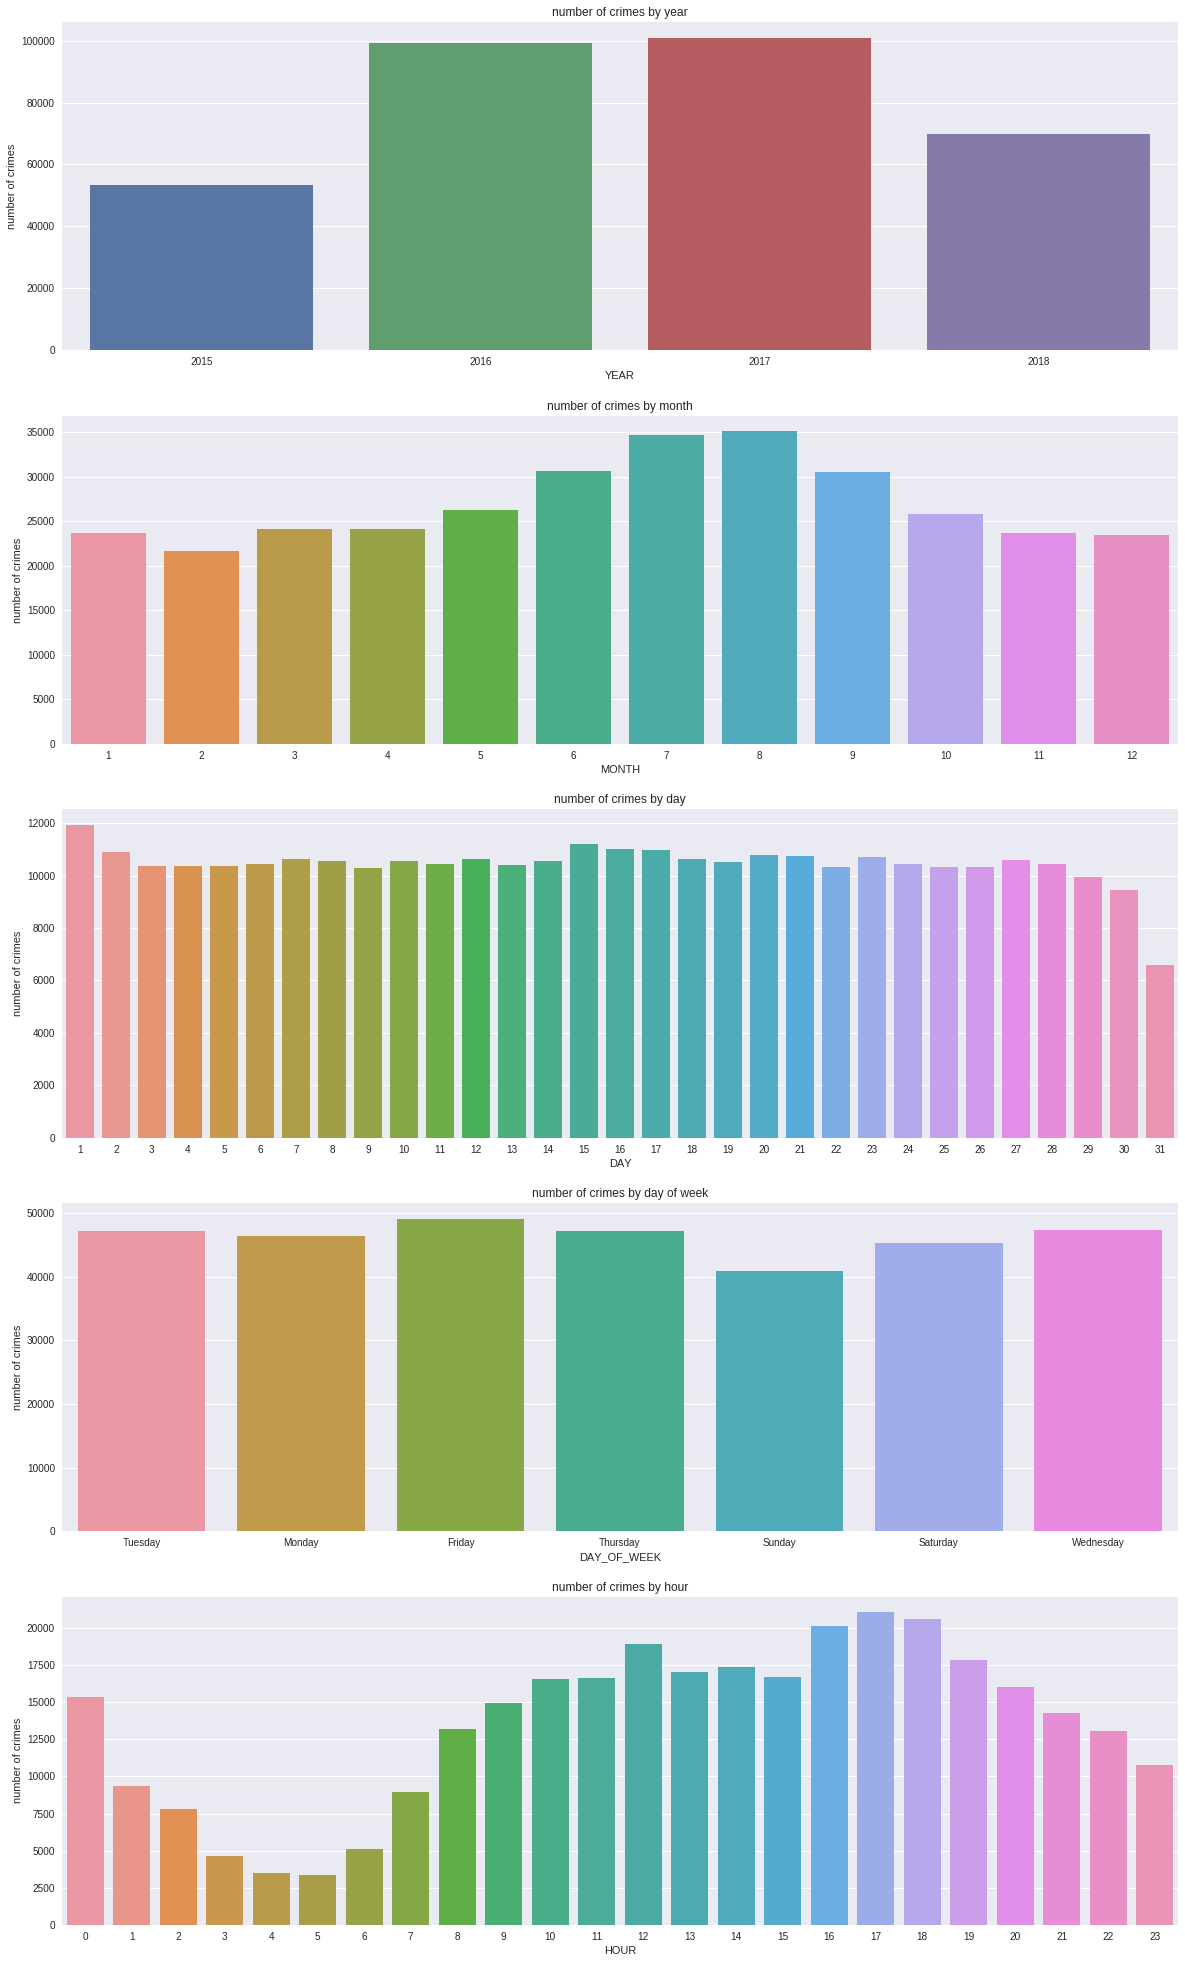

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(20,35))

sns.countplot(x="YEAR",data=data,ax=ax1)
ax1.set_ylabel("number of crimes")
ax1.set_title("number of crimes by year")

sns.countplot(x="MONTH",data=data,ax=ax2)
ax2.set_ylabel("number of crimes")
ax2.set_title("number of crimes by month")

sns.countplot(x="DAY",data=data,ax=ax3)
ax3.set_ylabel("number of crimes")
ax3.set_title("number of crimes by day")

sns.countplot(x="DAY_OF_WEEK",data=data,ax=ax4)
ax4.set_ylabel("number of crimes")
ax4.set_title("number of crimes by day of week")

sns.countplot(x="HOUR",data=data,ax=ax5)
ax5.set_ylabel("number of crimes")
ax5.set_title("number of crimes by hour")

According to this line chart, it is easy to see that the number of crime has a downward trend from 2017 to 2018. Otherwise, there is an upward trend from 2015 to 2017. However, such an analysis is unreasonable. Because our dataset were incomplete in 2015 and 2018. Therefore, we can only compare the data in 2016 and 2017. Compared with 2016, the number of crimes increased in 2017.

It seems that the number of crimes in Jun, July, Augest is larger than that in other months. However, we must not forget that there are usually only 28 days in February, and our data collection started in June 2015. We lost about half a year in 2015. For 2018, we are still collecting data.

For daily count, it seems that the crime rate at the beginning of the month and the middle of the month is higher than the end of the month. The highest number of crimes was committed on the first day of each month.

Friday is the most selected day by criminals, and It seems that criminals need to spend the weekend too. Compared with other times, the number of crimes on Sunday is lower.

Crimes rates are low between 1-7 in the morning, and gradually rise throughout the day, peaking around 6 pm.

### 3.3.5 Number of crimes per month ###

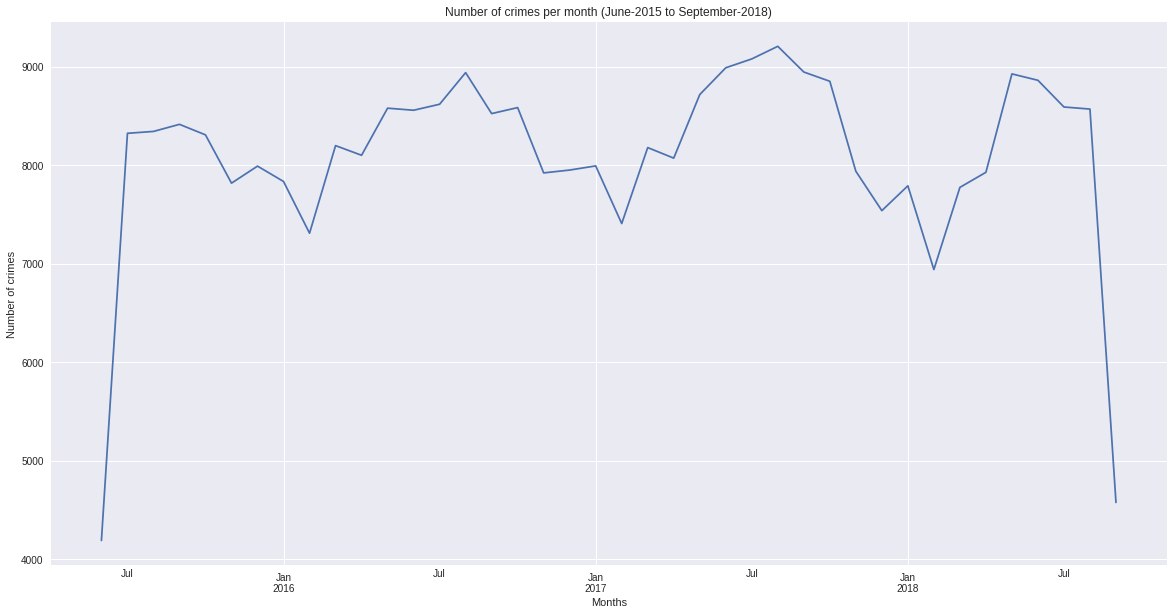

In [ ]:
plt.figure(figsize=(20,10))
data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (June-2015 to September-2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

Crime seems to be cyclical, with the lowest point near January and the highest in summer. This is helpful to the prediction of time series.

Although it is clear from this chart how crime has changed over the past few years, we can still break down the dates and explore them in depth.

Next, we will use a finer scale to visualize. I decided to take a look at the criminal record of the past year and calculate the total number of crimes every day in the past year. If this rolling sum is decreasing, then we can be sure that the crime rate has been declining during that year. Otherwise, we can think that the crime rate is on the rise.

### 3.3.6 Rolling sum of all crimes ###

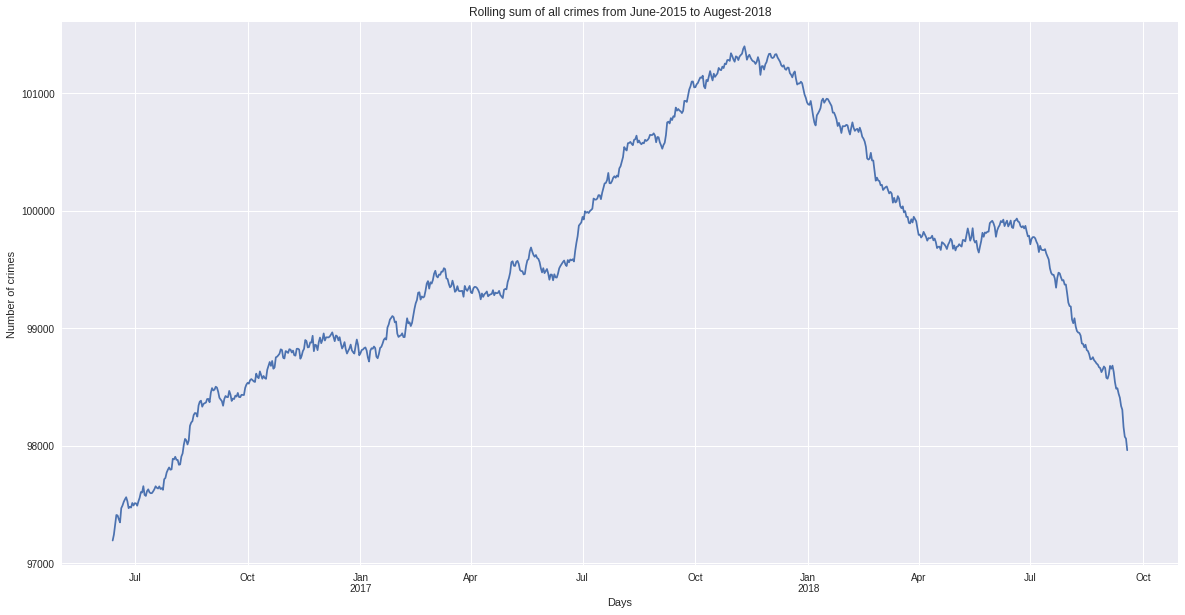

In [ ]:
plt.figure(figsize=(20,10))
data.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from June-2015 to Augest-2018')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

Despite two years of incomplete data, we can still see a clear upward trend in crime rates.
Next, we can analyze each category of crime and find their trend.

### 3.3.7 Trends of each category ###

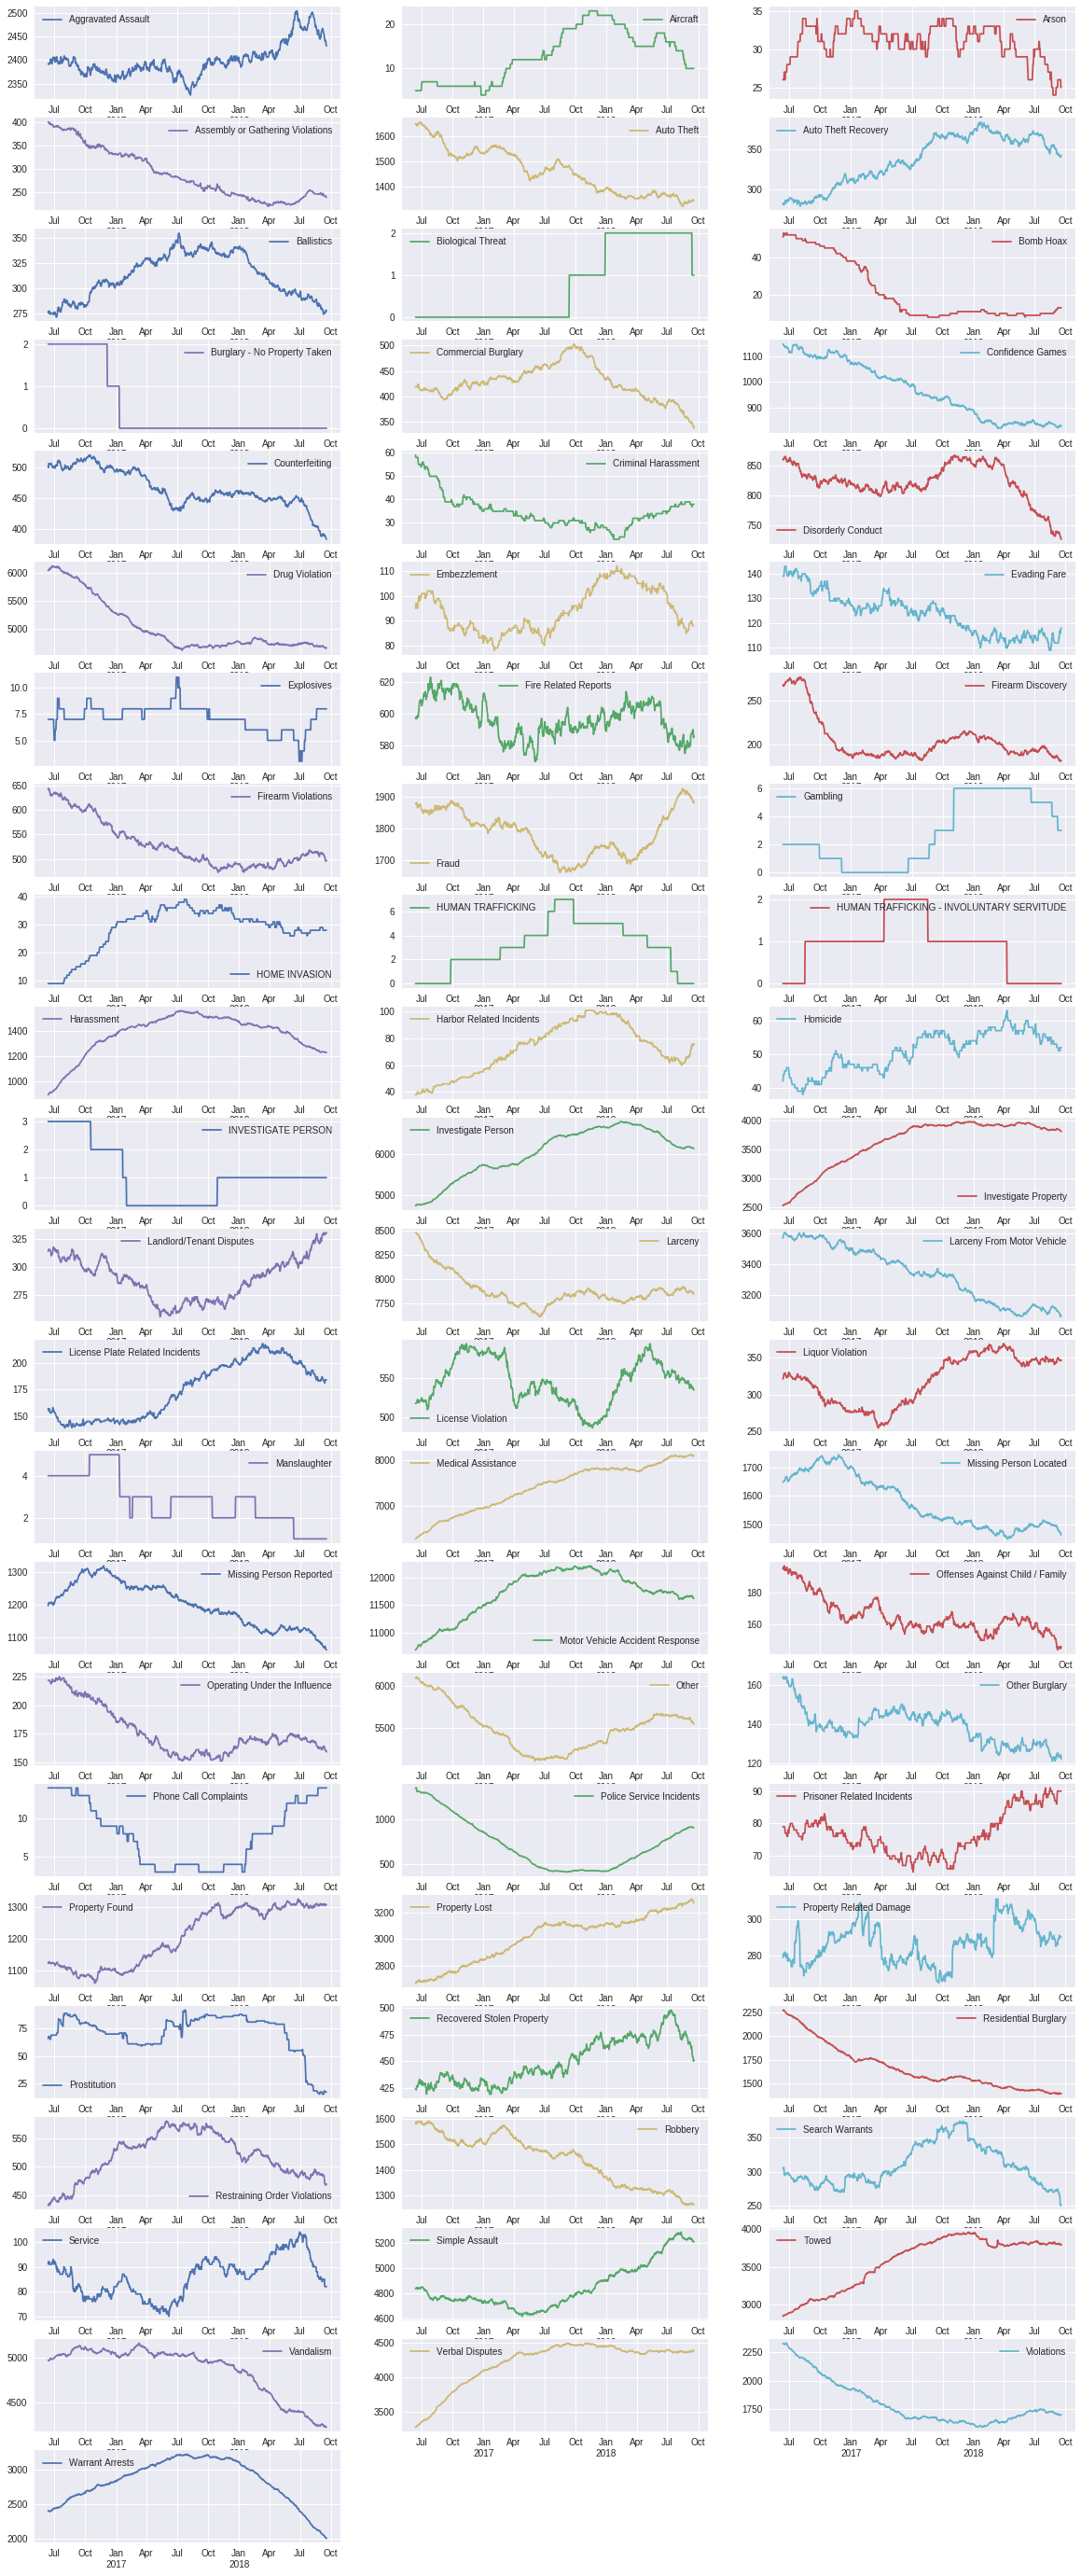

In [ ]:
crimes_count_date = data.pivot_table('INCIDENT_NUMBER', aggfunc=np.size, columns='OFFENSE_CODE_GROUP', index=data.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(20, 50), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

Great. We now have the trend of every type crime. This provides a great help to our social security analysis. There are some interesting details, for example, the crime rate of drug violation is decreasing. Is it because Massachusetts declared the legalization of marihuana in 2017?
It must be said that there are other types of crime that are on the rise, such as property lost, medical assistance. Is our social order better or worse?

### 3.3.8 Top 10 Category with shooting ###

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

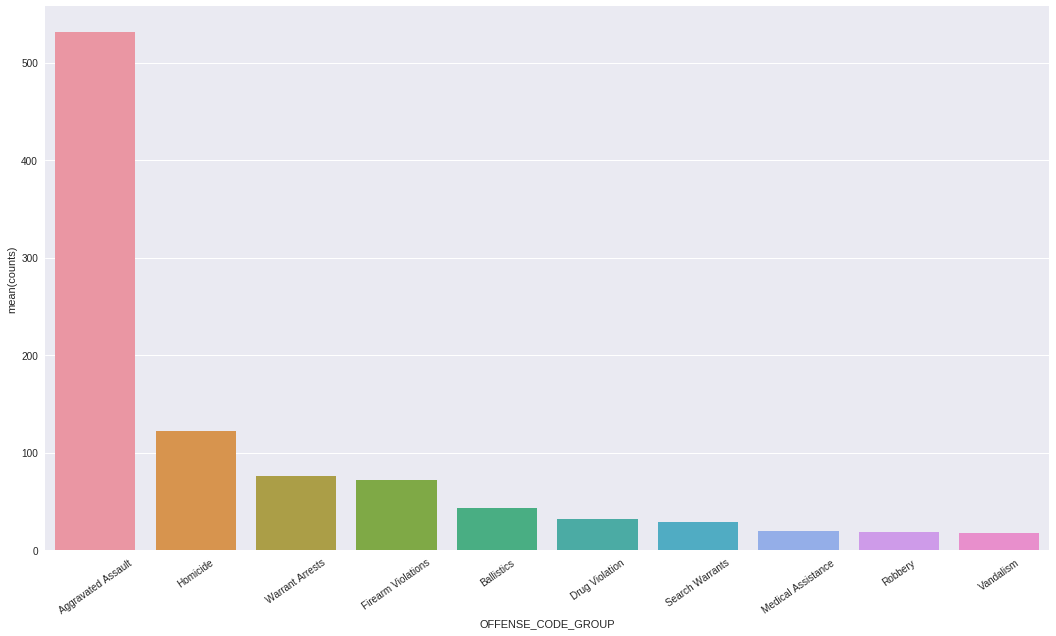

In [ ]:
crime_count_shoot=pd.DataFrame(shoot_data.groupby("OFFENSE_CODE_GROUP").size().sort_values(ascending=False).rename("counts").reset_index())
crime_count_shoot = pd.concat([crime_count_shoot["counts"],crime_count_shoot["OFFENSE_CODE_GROUP"]],axis=1)
f,ax = plt.subplots(figsize=(18,10))
fig= sns.barplot(x = "OFFENSE_CODE_GROUP",y="counts",data=crime_count_shoot.head(10))
fig.axis(ymin=0)
plt.xticks(rotation=35)

We extracted 1,000 cases of shooting as a separate dataset and analyzed them separately. Because I believe that shooting is a serious threat to social security. It is necessary for us to know the time and place of its occurrence. 

From this bar chart, we can see which kind of crime is the most common with the shooting. Obviously, aggravated assault is obviously more than other categories.

### 3.3.9 Time distribution of shooting ###

Text(0.5,1,u'number of crimes by hour')

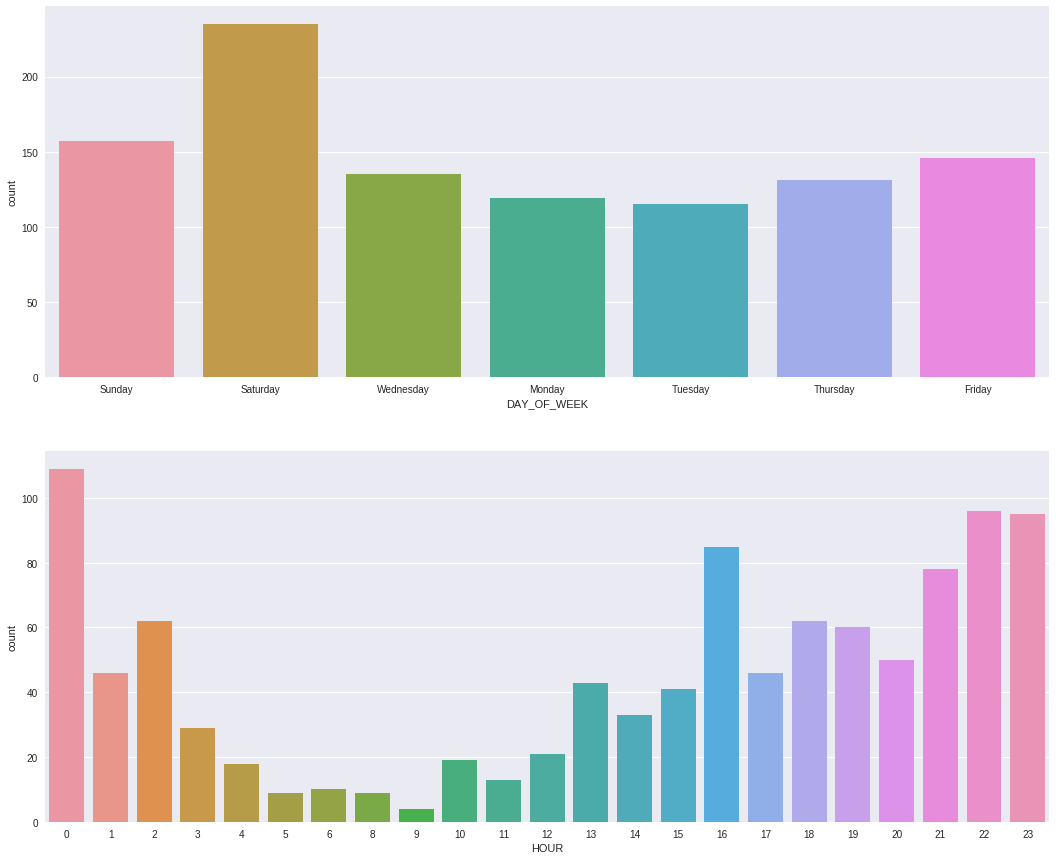

In [ ]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(18,15))


sns.countplot(x="DAY_OF_WEEK",data=shoot_data,ax=ax1)
ax3.set_ylabel("number of crimes")
ax3.set_title("number of crimes by day of week")

sns.countplot(x="HOUR",data=shoot_data,ax=ax2)
ax4.set_ylabel("number of crimes")
ax4.set_title("number of crimes by hour")

Because we only have 1000 shooting datasets, so I decided to focus on what happens on the day of the week and the hour of the day.

Unlike our previous statistics on the total number of crimes, the number of shootings on Saturday is much higher than others.

## 3.4 Geospatial Visualization ##

### 3.4.1 Distribution of all crimes on the map ###

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=5744508.31655,2355894.83869,5781985.70409,2395195.62513&bboxSR=2770&imageSR=2770&size=1500,1572&dpi=96&format=png32&f=image


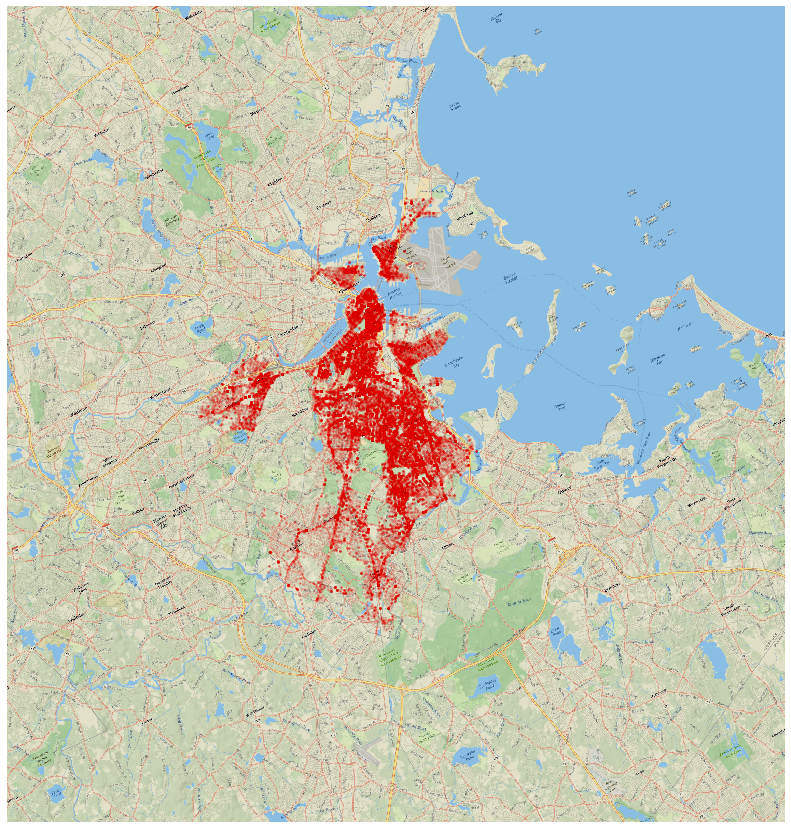

In [ ]:
m = Basemap(projection='mill',llcrnrlat=data.Lat.min(),urcrnrlat=data.Lat.max(),
            llcrnrlon=data.Long.min()-0.2,urcrnrlon=data.Long.max()+0.2,resolution="c",epsg=2770)
x,y= m(tuple(data.Long[(data.Long.isnull()==False)]),tuple(data.Lat[(data.Lat.isnull()==False)]))

plt.figure(figsize=(20,15))
m.arcgisimage(service="NatGeo_World_Map",xpixels=1500,verbose=True)
m.plot(x,y,'ro',markersize=2,alpha=0.03)

It looks pretty good. We marked each case in the map according to its geographical location. But there are too much data, we can't eliminate the boundaries. Can we  do clustering?

### 3.4.2 Distribution of Larceny on the map ###

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=5744508.31655,2355894.83869,5781985.70409,2395195.62513&bboxSR=2770&imageSR=2770&size=1500,1572&dpi=96&format=png32&f=image


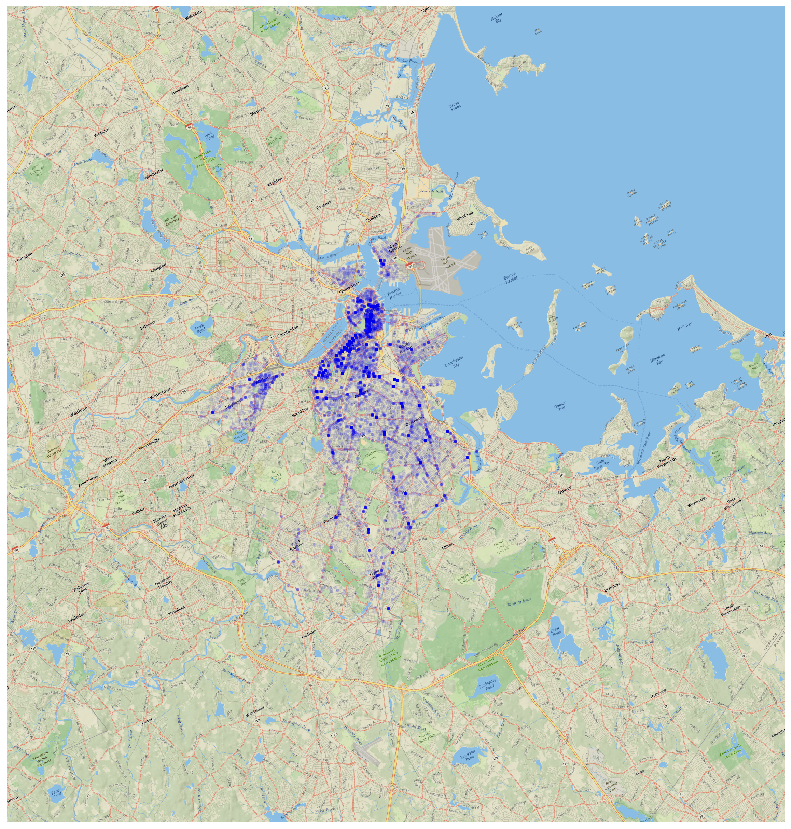

In [ ]:
drup_data=data[data["OFFENSE_CODE_GROUP"]=="Larceny"]
m = Basemap(projection='mill',llcrnrlat=data.Lat.min(),urcrnrlat=data.Lat.max(),
            llcrnrlon=data.Long.min()-0.2,urcrnrlon=data.Long.max()+0.2,resolution="c",epsg=2770)
x,y= m(tuple(drup_data.Long),tuple(drup_data.Lat))

plt.figure(figsize=(20,15))
m.arcgisimage(service="NatGeo_World_Map",xpixels=1500,verbose=True)
m.plot(x,y,'ro',markersize=3,alpha=0.05,color='blue')

It's very interesting. Most of the burglary took place near the center of the city.

###3.4.3 Distribution of Shooting on the map ###

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=5745170.95973,2356714.63121,5779059.09622,2393022.40443&bboxSR=2770&imageSR=2770&size=1500,1607&dpi=96&format=png32&f=image


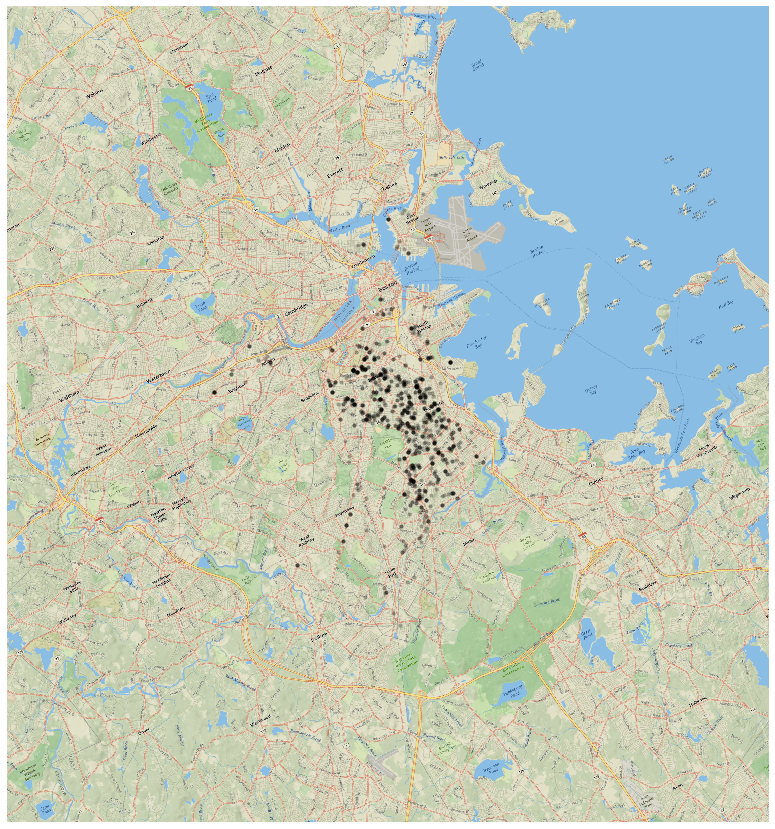

In [ ]:
m = Basemap(projection='mill',llcrnrlat=shoot_data.Lat.min(),urcrnrlat=shoot_data.Lat.max(),
            llcrnrlon=shoot_data.Long.min()-0.2,urcrnrlon=shoot_data.Long.max()+0.2,resolution="c",epsg=2770)
x,y= m(tuple(shoot_data.Long[(shoot_data.Long.isnull()==False)]),tuple(shoot_data.Lat[(shoot_data.Lat.isnull()==False)]))

plt.figure(figsize=(20,15))
m.arcgisimage(service="NatGeo_World_Map",xpixels=1500,verbose=True)
m.plot(x,y,'ro',markersize=4,alpha=0.3,color="black")

Wow, the result is not quite the same as I expected. I thought the downtown area would be the high shooting area. But southern Boston is the gathering place. This reminds me of the fact that most gangs in films originate in southern Boston.

### 3.4.4 Heatmap Clustering of Shooting ###

In [ ]:
from folium import plugins
from folium.plugins import HeatMap
map_heat= folium.Map(location=[42.3301, -71.0589],zoom_start = 12) 
shoot_data=shoot_data.dropna(axis = 0, subset = ['Lat'] )
heat_data = [[row['Lat'],row['Long']] for index, row in shoot_data.iterrows()]
HeatMap(heat_data,radius=10).add_to(map_heat)
map_heat


Folium is a good map package. Clustering looks pretty good.

### 3.4.5 Heatmap with time series ###

**Click the third blank boxes in the bottom left corner of the map to play.**

In [ ]:
# Click the third blank boxes in the bottom left corner of the map to play.
map_heat = folium.Map(location=[42.3301, -71.0589],zoom_start = 12) 
heat_df = shoot_data
heat_df['Weight'] = shoot_data['OCCURRED_ON_DATE'].str[5:7]
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Lat','Long', 'Weight'])
heat_data = [[[row['Lat'],row['Long']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(1,13)]
hm = plugins.HeatMapWithTime(heat_data,radius=20,auto_play=False,max_opacity=0.5)
hm.add_to(map_heat)
map_heat

**Click the third blank boxes in the bottom left corner of the map to play.**

We clustered the locations where the shooting took place every month. The numbers on the lower left corner of the map represent the month, and the map will play every month's shooting situation sequentially. **DON'T FORGET CLICK THE BUTTONS ON THE LEFT CORNER.**

# 4.Feature Engineering

##4.1 Create new features for schools

Boston is one of the oldest cities in the United States, and it brings together the best educational resources in the world. As a student, attention to campus safety is essential. The following picture shows some famous universities in Boston. I will select some of them to create new features.

![替代文字](https://upload.wikimedia.org/wikipedia/commons/0/08/Boston_college_town_map.png)

There are more than 15 universities in the map. I will just choose 6 universities to analyze: Harvard University, MIT, Boston University, Boston College, Northeastern University and Umass Boston.

In [ ]:
#A function that determines whether a coordinate is in the region.
def in_school(aLon, aLat,pointList):
    iSum = 0
    iCount = len(pointList)
    if(iCount < 3):
        return False        
    for i in range(iCount):        
        pLon1 = pointList[i][0]
        pLat1 = pointList[i][1]        
        if(i == iCount - 1):            
            pLon2 = pointList[0][0]
            pLat2 = pointList[0][1]
        else:
            pLon2 = pointList[i + 1][0]
            pLat2 = pointList[i + 1][1]        
        if ((aLat >= pLat1) and (aLat < pLat2)) or ((aLat>=pLat2) and (aLat < pLat1)):            
            if (abs(pLat1 - pLat2) > 0):                
                pLon = pLon1 - ((pLon1 - pLon2) * (pLat1 - aLat)) / (pLat1 - pLat2);               
                if(pLon < aLon):
                    iSum += 1 
    if(iSum % 2 != 0):
        return 1
    else:
        return 0

In [ ]:
#The spatial coordinates of each school.
Harvard=[(42.363660, -71.142986),(42.358111, -71.141426),(42.360725, -71.117750),(42.382793, -71.111878),(42.386560, -71.130511)]
MIT=[(42.354282, -71.110993),(42.353296, -71.105274),(42.361519, -71.078917),(42.364506, -71.102119)]
Boston_University=[(42.355176, -71.124286),(42.352173, -71.125177),(42.345303, -71.110354),(42.348074, -71.095055),(42.354405, -71.095784)]
Boston_College=[(42.346953, -71.162759),(42.332705, -71.176845),(42.327869, -71.163653),(42.346460, -71.149910)]
Northeastern=[(42.342624, -71.090236),(42.336956, -71.093728),(42.334585, -71.089640),(42.339292, -71.083361),(42.342271, -71.087617)]
Umass_Boston=[(42.318969, -71.036603),(42.313583, -71.046674),(42.309565, -71.045574),(42.310247, -71.037482),(42.317455, -71.029107)]

#create new features for schools
data['Harvard'] =data.apply(lambda x: in_school(x['Lat'], x['Long'],Harvard), axis=1)
data['MIT'] =data.apply(lambda x: in_school(x['Lat'], x['Long'],MIT), axis=1)
data['Boston_University'] =data.apply(lambda x: in_school(x['Lat'], x['Long'],Boston_University), axis=1)
data['Boston_College'] =data.apply(lambda x: in_school(x['Lat'], x['Long'],Boston_College), axis=1)
data['Northeastern'] =data.apply(lambda x: in_school(x['Lat'], x['Long'],Northeastern), axis=1)
data['Umass_Boston'] =data.apply(lambda x: in_school(x['Lat'], x['Long'],Umass_Boston), axis=1)


In [ ]:
data.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
OCCURRED_ON_DATE                                                        
2018-09-18 20:36:00      I182075503           619             Larceny   
2018-09-18 21:34:00      I182075502          1102               Fraud   
2018-09-18 21:02:00      I182075501          3115  Investigate Person   
2018-09-18 20:21:00      I182075500          3006  Medical Assistance   
2018-09-18 18:50:00      I182075499           613             Larceny   

                                 OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  \
OCCURRED_ON_DATE                                                               
2018-09-18 20:36:00               LARCENY ALL OTHERS       A1             92   
2018-09-18 21:34:00  FRAUD - FALSE PRETENSE / SCHEME       B2            238   
2018-09-18 21:02:00               INVESTIGATE PERSON      C11            362   
2018-09-18 20:21:00    SICK/INJURED/MEDICAL - PERSON       D4            953   
2018-09-18 18:50:00              LARCENY SHOPLIFTING      NaN                  

                    SHOOTING    OCCURRED_ON_DATE  YEAR  MONTH      ...       \
OCCURRED_ON_DATE                                                   ...        
2018-09-18 20:36:00      NaN 2018-09-18 20:36:00  2018      9      ...        
2018-09-18 21:34:00      NaN 2018-09-18 21:34:00  2018      9      ...        
2018-09-18 21:02:00      NaN 2018-09-18 21:02:00  2018      9      ...        
2018-09-18 20:21:00      NaN 2018-09-18 20:21:00  2018      9      ...        
2018-09-18 18:50:00      NaN 2018-09-18 18:50:00  2018      9      ...        

                           Lat       Long                     Location DAY  \
OCCURRED_ON_DATE                                                             
2018-09-18 20:36:00  42.358923 -71.058354  (42.35892279, -71.05835354)  18   
2018-09-18 21:34:00  42.318730 -71.066607  (42.31873011, -71.06660708)  18   
2018-09-18 21:02:00  42.293390 -71.071557  (42.29338993, -71.07155745)  18   
2018-09-18 20:21:00  42.337212 -71.075976  (42.33721215, -71.07597603)  18   
2018-09-18 18:50:00        NaN        NaN   (-1.00000000, -1.00000000)  18   

                     Harvard  MIT Boston_University  Boston_College  \
OCCURRED_ON_DATE                                                      
2018-09-18 20:36:00        0    0                 0               0   
2018-09-18 21:34:00        0    0                 0               0   
2018-09-18 21:02:00        0    0                 0               0   
2018-09-18 20:21:00        0    0                 0               0   
2018-09-18 18:50:00        0    0                 0               0   

                     Northeastern  Umass_Boston  
OCCURRED_ON_DATE                                 
2018-09-18 20:36:00             0             0  
2018-09-18 21:34:00             0             0  
2018-09-18 21:02:00             0             0  
2018-09-18 20:21:00             0             0  
2018-09-18 18:50:00             0             0  

[5 rows x 24 columns]

## 4.2 Crimes count by schools###

In [ ]:
street_count=pd.DataFrame(data[['Harvard','MIT','Boston_University','Boston_College','Northeastern','Umass_Boston']].apply(sum))
street_count.columns=['counts']
street_count.sort_values(by=['counts'],ascending=False)

counts
Boston_University    1651
Harvard              1114
Boston_College       1009
Northeastern          851
Umass_Boston            2
MIT                     0

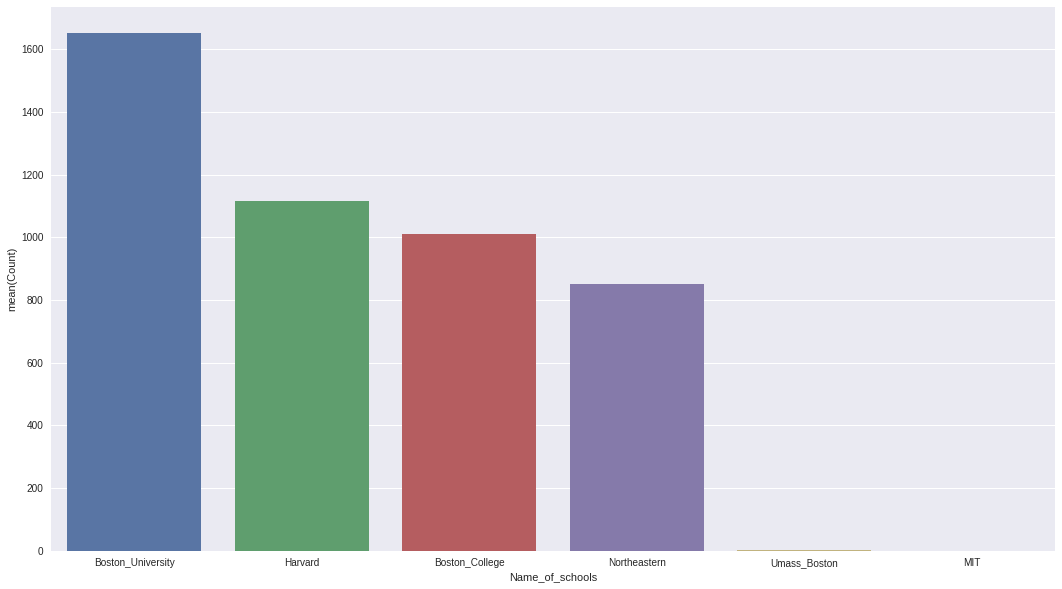

In [ ]:
dicti=({'Harvard':data[['Harvard']].apply(sum),'MIT':data[['MIT']].apply(sum),'Boston_University':data[['Boston_University']].apply(sum),'Boston_College':data[['Boston_College']].apply(sum),'Northeastern':data[['Northeastern']].apply(sum),'Umass_Boston':data[['Umass_Boston']].apply(sum)})
pd_df = pd.DataFrame(list(dicti.iteritems()))
pd_df.columns =["Name_of_schools","Count"]
plt.figure(figsize=(18,10))
ax = sns.barplot(x="Name_of_schools", y= "Count",data=pd_df )
plt.show()

Base on the bar chart, Boston University has the highest crime rate. Oh, I can't believe that MIT's crime rate is 0. It seems that the security of MIT is very good. On the other hand, Harvard has a relatively high crime rate. Although the two schools are not far apart. 

## 4.3 Crimes in Harvard University ##

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

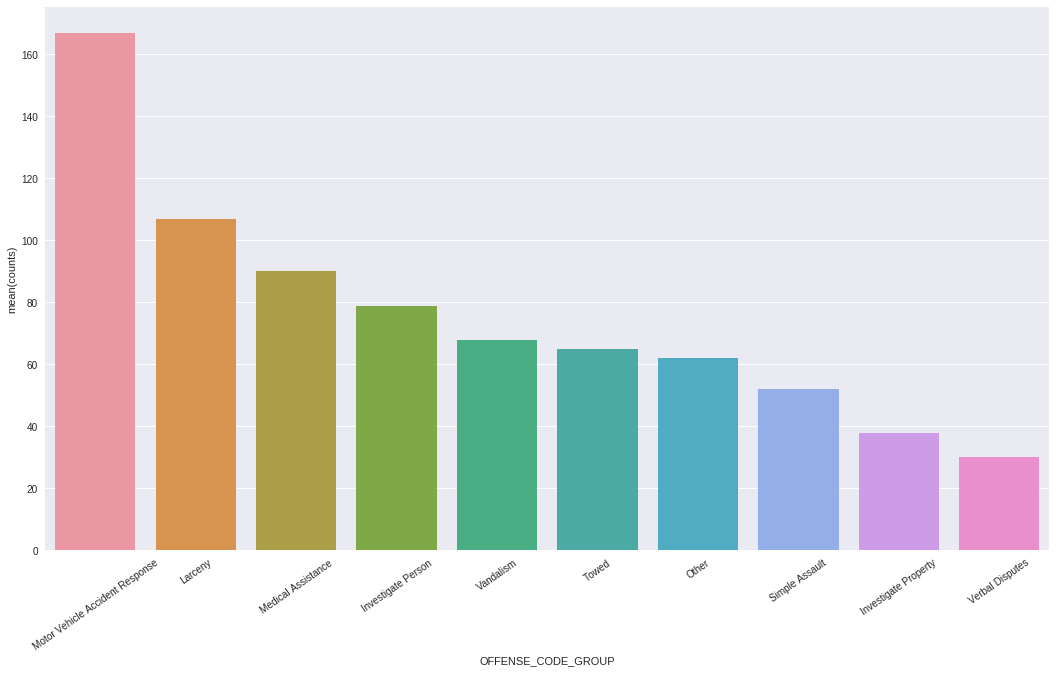

In [ ]:
hvu_data=data[data["Harvard"]==1]
hvu_count=pd.DataFrame(hvu_data.groupby("OFFENSE_CODE_GROUP").size().sort_values(ascending=False).rename("counts").reset_index())

hvu_count = pd.concat([hvu_count["counts"],hvu_count["OFFENSE_CODE_GROUP"]],axis=1)
f,ax = plt.subplots(figsize=(18,10))
fig= sns.barplot(x = "OFFENSE_CODE_GROUP",y="counts",data=hvu_count.head(10))
fig.axis(ymin=0)
plt.xticks(rotation=35)

## 4.4 Crimes in Northeastern University ##

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

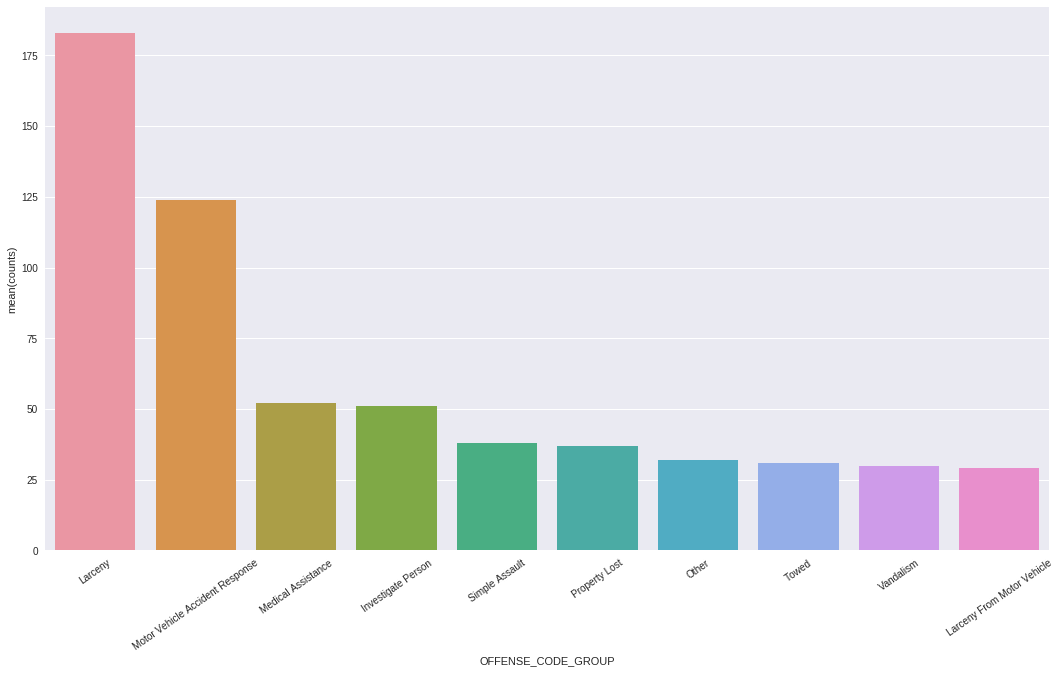

In [ ]:
neu_data=data[data["Northeastern"]==1]
neu_count=pd.DataFrame(neu_data.groupby("OFFENSE_CODE_GROUP").size().sort_values(ascending=False).rename("counts").reset_index())

neu_count = pd.concat([neu_count["counts"],neu_count["OFFENSE_CODE_GROUP"]],axis=1)
f,ax = plt.subplots(figsize=(18,10))
fig= sns.barplot(x = "OFFENSE_CODE_GROUP",y="counts",data=neu_count.head(10))
fig.axis(ymin=0)
plt.xticks(rotation=35)

# 5.Modeling

##5.1 Kmeans Clustering##

###5.1.1 Two Clusters###

In [ ]:
X = data[['Lat','Long']]
X =X.dropna(axis = 0, subset = ['Lat'] )

In [ ]:
def doKmeans(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(X, 2)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

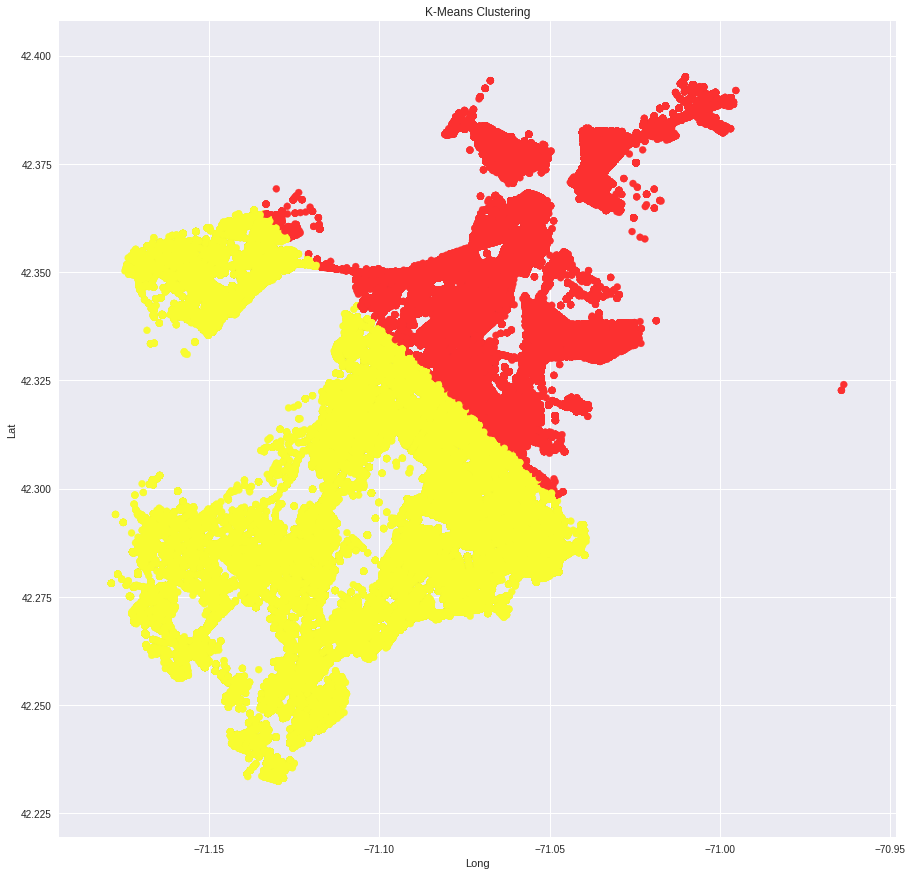

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
LABEL_COLOR_MAP = {0 : '#fc3030', 1 : '#f8fc30',2 : '#70fc30',3 : '#30fc92', 4 : '#30fce7',5: '#30cffc',6: '#3088fc',7:'#8b30fc',8:'#f530fc',9:'#fc30ad',10:'#fc306d'}
labels=kmeans[0]
label_color = [LABEL_COLOR_MAP[l] for l in labels]
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.scatter(X['Long'],X['Lat'], c=label_color)


###5.1.2 Three Clusters###

In [ ]:
X = data[['Lat','Long']]
X =X.dropna(axis = 0, subset = ['Lat'] )

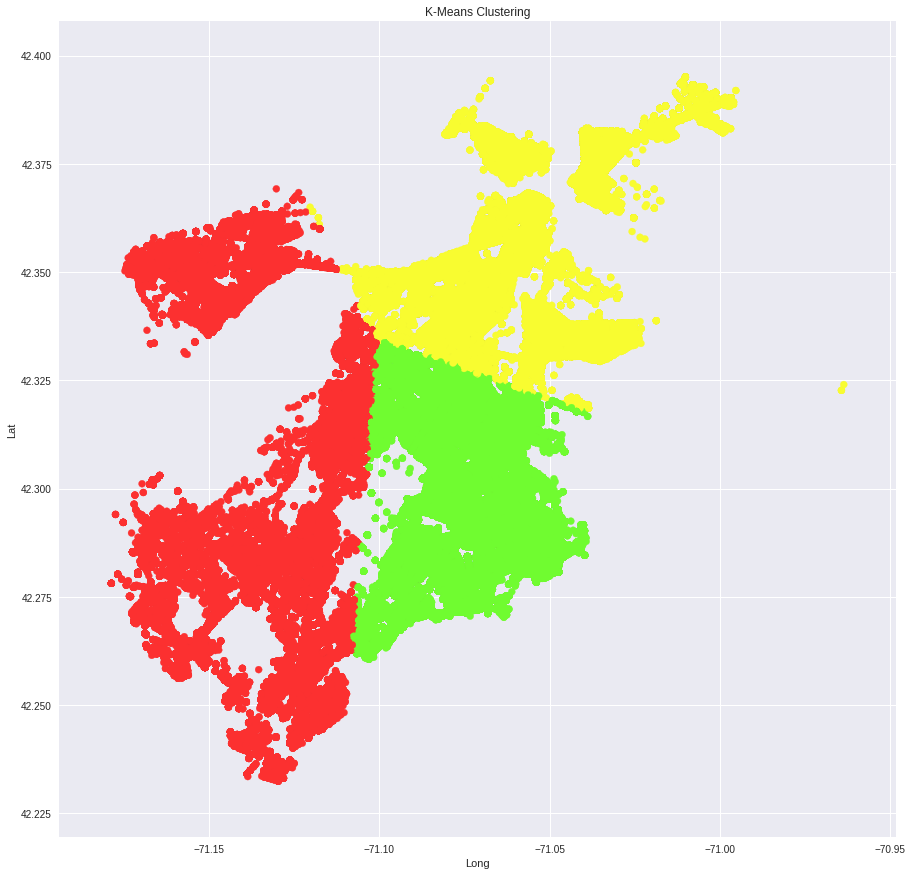

In [ ]:
clust_labels, cent = doKmeans(X, 3)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
LABEL_COLOR_MAP = {0 : '#fc3030', 1 : '#f8fc30',2 : '#70fc30',3 : '#30fc92', 4 : '#30fce7',5: '#30cffc',6: '#3088fc',7:'#8b30fc',8:'#f530fc',9:'#fc30ad',10:'#fc306d'}
labels=kmeans[0]
label_color = [LABEL_COLOR_MAP[l] for l in labels]
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.scatter(X['Long'],X['Lat'], c=label_color)


###5.1.3 Five Clusters###

In [ ]:
X = data[['Lat','Long']]
X =X.dropna(axis = 0, subset = ['Lat'] )

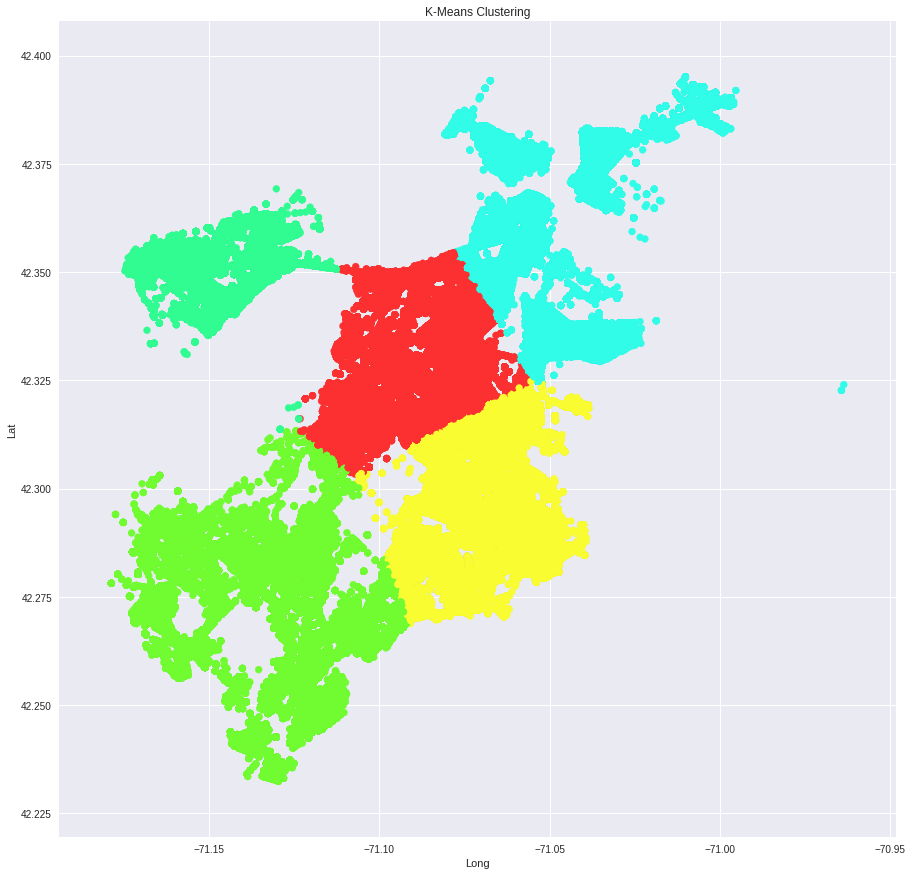

In [ ]:
clust_labels, cent = doKmeans(X, 5)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
LABEL_COLOR_MAP = {0 : '#fc3030', 1 : '#f8fc30',2 : '#70fc30',3 : '#30fc92', 4 : '#30fce7',5: '#30cffc',6: '#3088fc',7:'#8b30fc',8:'#f530fc',9:'#fc30ad',10:'#fc306d'}
labels=kmeans[0]
label_color = [LABEL_COLOR_MAP[l] for l in labels]
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.scatter(X['Long'],X['Lat'], c=label_color)


###5.1.4 Ten Clusters###

In [ ]:
X = data[['Lat','Long']]
X =X.dropna(axis = 0, subset = ['Lat'] )

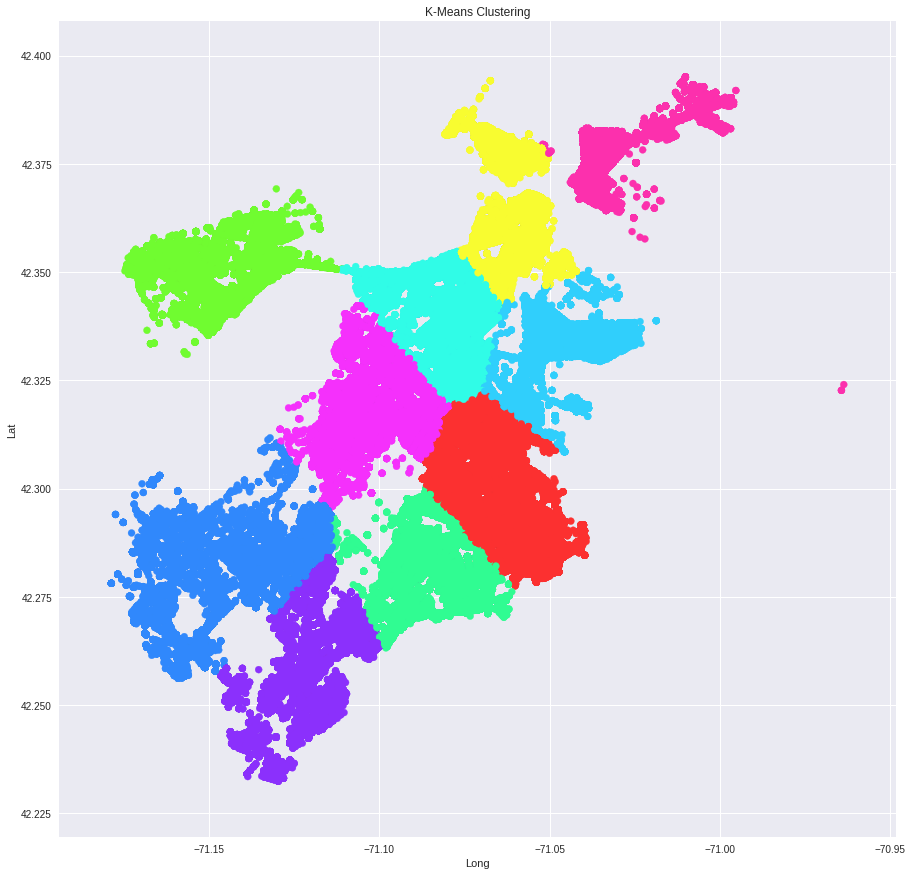

In [ ]:
clust_labels, cent = doKmeans(X, 10)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
LABEL_COLOR_MAP = {0 : '#fc3030', 1 : '#f8fc30',2 : '#70fc30',3 : '#30fc92', 4 : '#30fce7',5: '#30cffc',6: '#3088fc',7:'#8b30fc',8:'#f530fc',9:'#fc30ad',10:'#fc306d'}
labels=kmeans[0]
label_color = [LABEL_COLOR_MAP[l] for l in labels]
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.scatter(X['Long'],X['Lat'], c=label_color)


## 5.2 Time series prediction with ARIMA ##

###5.2.1 Time formatting ###

In [ ]:
crimes["Date"]=pd.to_datetime(crimes.OCCURRED_ON_DATE)

In [ ]:
crimes['new_date_column'] = crimes['Date'].dt.date
crime_per_date=crimes.groupby('new_date_column')['INCIDENT_NUMBER'].count().reset_index()
crime_per_date.head()

new_date_column  INCIDENT_NUMBER
0      2015-06-15              249
1      2015-06-16              249
2      2015-06-17              234
3      2015-06-18              294
4      2015-06-19              289

In [ ]:
crime_per_date.isnull().sum()

new_date_column    0
INCIDENT_NUMBER    0
dtype: int64

In [ ]:
crime_per_date['new_date_column'] = pd.to_datetime(crime_per_date['new_date_column'])
crime_per_date = crime_per_date.set_index('new_date_column')

###5.2.2  Time series of crimes by days.

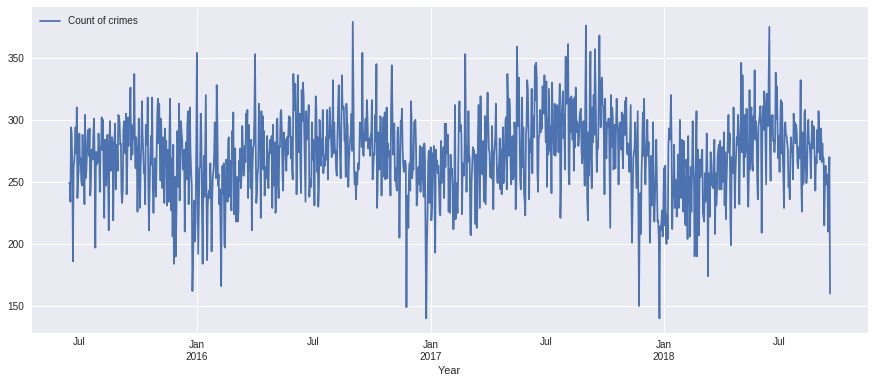

In [ ]:
crime_per_date.plot(figsize=(15, 6))
plt.xlabel("Year")
plt.legend(['Count of crimes'])

###

###5.2.3 Time Exploration 

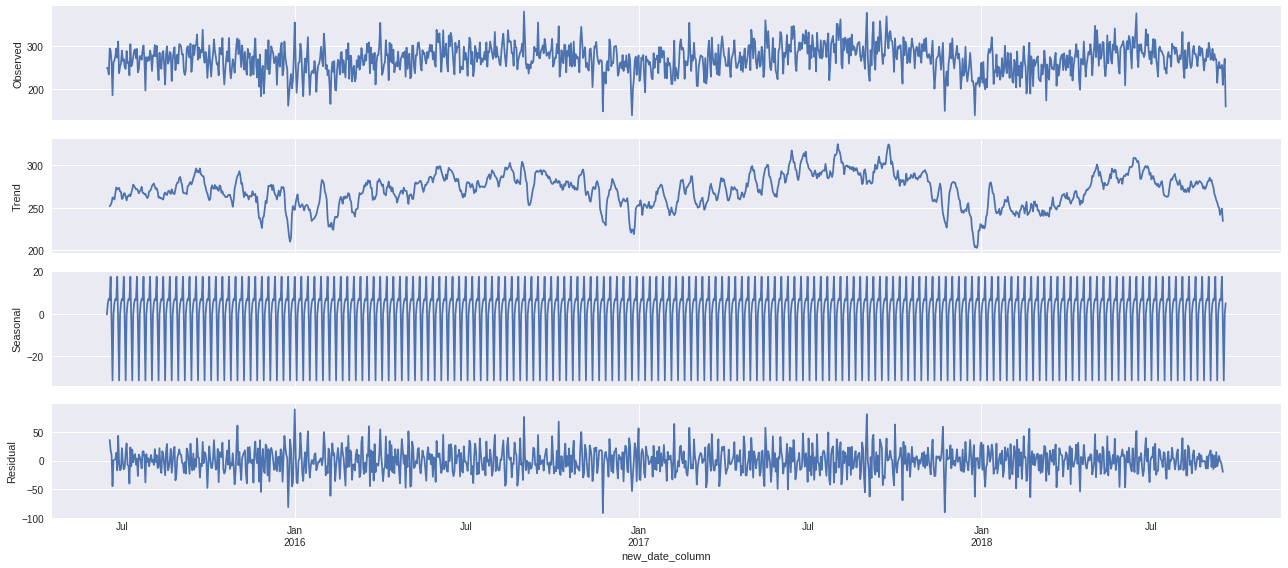

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(crime_per_date, model='additive')
fig = decomposition.plot()
plt.show()

###5.2.4 Model Training

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(crime_per_date,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False, fit_kw=dict(method='css'))
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:15270.8678896
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:11542.3079394
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:12297.4422791
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:11669.9813689
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:11853.0916664
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:11533.9197493
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:15335.2626623
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:14334.934525
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:12226.7555556
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:11382.4706811


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:12310.7244356


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:11510.6884406
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:11757.6528704
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:11383.6811009
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:11849.8093603
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:11801.8725714
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:11862.7289462
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:11851.5817428
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:12283.997539
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:11782.5769381
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:11501.9872667
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:11366.2022504
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:12282.3470096
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:11324.007748
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:11389.4211935
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:11367.0878158
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:11852.823078
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:11309.8435249
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:12002.6306726
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:11860.3005553
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - A

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:11401.9436622
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:11747.7320968
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:11314.6532565
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:11848.9471906
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:11693.4572288
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:12716.9603226
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:11661.079526
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:11696.293916
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:11695.4056361
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:12159.4485495
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:11632.1415268
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:11458.5919107
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:11325.1196267
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:12239.8267805
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:11279.1481335
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:11334.2319734
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:11326.8994371
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:11754.4222691
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:11266.0044678


###5.2.5 Model Evaluation###

In [ ]:
results.aic

11266.004467753211

In [ ]:
mod = sm.tsa.statespace.SARIMAX(crime_per_date,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print results.summary()

                                 Statespace Model Results                                 
Dep. Variable:                    INCIDENT_NUMBER   No. Observations:                 1192
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 12)   Log Likelihood               -5869.866
Date:                            Fri, 21 Sep 2018   AIC                          11747.732
Time:                                    11:26:57   BIC                          11768.066
Sample:                                06-15-2015   HQIC                         11755.394
                                     - 09-18-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1307      0.095     -1.382      0.167      -0.316       0.055
ma.L1          0.4276      0.086   

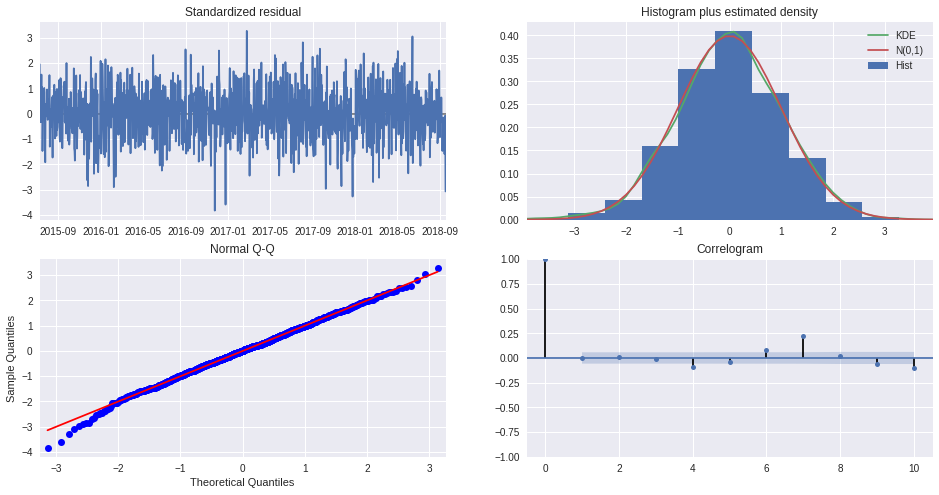

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()


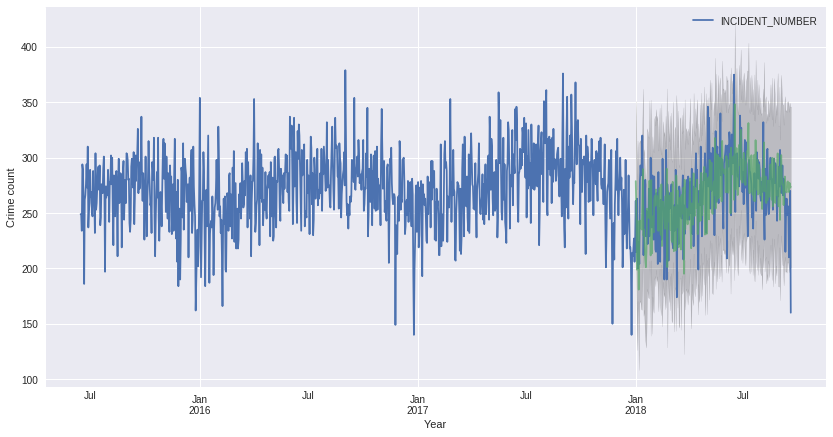

In [ ]:
pred= results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = crime_per_date['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Year')
ax.set_ylabel('Crime count')
plt.show()

### 5.2.6 Prediction

Predict the number of crimes per day in 60 days after September 18th.

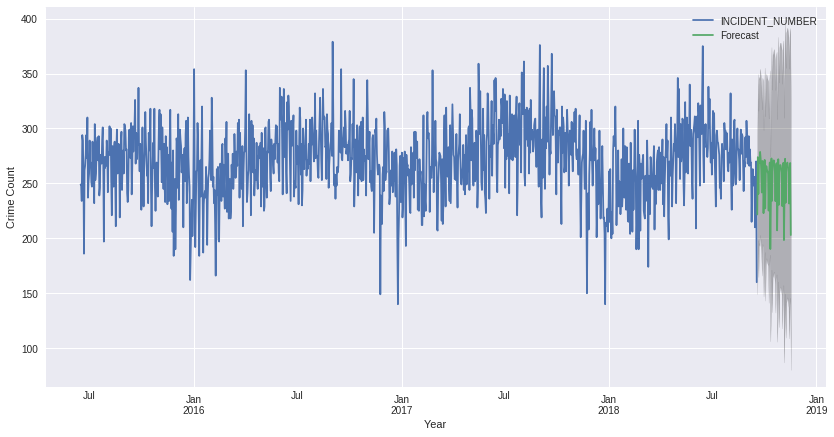

In [ ]:
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = crime_per_date.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Crime Count')
plt.legend()
plt.show()